# TITANIC DATASET


In [1]:
#Loading the packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Loading the datasets
df = pd.read_csv('train.csv')
sample = pd.read_csv('gender_submission.csv')
test = pd.read_csv('test.csv')
data = df.append(test, sort = False)

In [3]:
data.count()

PassengerId    1309
Survived        891
Pclass         1309
Name           1309
Sex            1309
Age            1046
SibSp          1309
Parch          1309
Ticket         1309
Fare           1308
Cabin           295
Embarked       1307
dtype: int64

In [4]:
# Finding total missing values
missing = pd.concat([data.isnull().sum(),data.isnull().count()],axis = 1,keys=['Missing Count','Total Count'])
missing['Missing Count'].sort_values(ascending = False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
Name: Missing Count, dtype: int64

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Grouping people as per the Ticket Number
tick = pd.DataFrame(data.Ticket.value_counts())
tick.rename(columns={'Ticket':'TicketCount'},inplace=True)
tick['TicketID']=pd.Categorical(tick.index).codes
tick.loc[tick.TicketCount <3 , 'TicketID'] = -1
data = pd.merge(left=data,right=tick,left_on='Ticket',right_index=True,how='left',sort='False')

In [7]:
data.drop(['TicketCount','Ticket'],axis=1,inplace=True)

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,TicketID
257,258,1.0,1,"Cherry, Miss. Gladys",female,30.0,0,0,86.50,B77,S,0
504,505,1.0,1,"Maioni, Miss. Roberta",female,16.0,0,0,86.50,B79,S,0
759,760,1.0,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,86.50,B77,S,0
262,263,0.0,1,"Taussig, Mr. Emil",male,52.0,1,1,79.65,E67,S,1
558,559,1.0,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,79.65,E67,S,1


In [9]:
#Grouping as per the family name
data['Family Name'] = data.Name.apply(lambda x : str.split(x,',')[0])

In [10]:
#Creating a feature based on the Title of the name
def TitleFunc(data):
    sub = {'Col.','Rev.', 'Mr.','Sir.','Jonkheer.', 'Don.','Dona.','Capt.',
           'General.','Major.'}
    sub1 = {'Miss.','Mme.','Mlle.','Ms.'}
    sub2 = {'Mrs.','Countess.','Lady.'}
    sub3 = {'Master.'}
    sub4 = {'Dr.'}
    pattern, pattern1, pattern2, pattern3 = '|'.join(sub), '|'.join(sub1), '|'.join(sub2), '|'.join(sub3)
    pattern4 = '|'.join(sub4)
    data['Title'] = ''
    data.loc[data['Name'].str.contains(pattern),'Title'] = 'Mr.'
    data.loc[data['Name'].str.contains(pattern1),'Title'] = 'Miss.'
    data.loc[data['Name'].str.contains(pattern2),'Title'] = 'Mrs.'
    data.loc[data['Name'].str.contains(pattern3),'Title'] = 'Master.'
    data.loc[(data['Name'].str.contains(pattern)) & (data['Age'] <=13),'Title'] = 'Master.'
    data.loc[(data['Name'].str.contains(pattern4)) & (data['Sex'] == 'female'),'Title'] = 'Dr.f'
    data.loc[(data['Name'].str.contains(pattern4)) & (data['Sex'] == 'male'),'Title'] = 'Dr.m'
TitleFunc(data)

C:\Users\Rocker\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


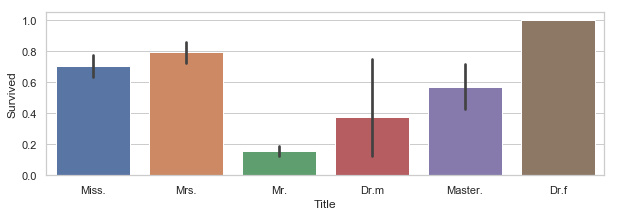

In [11]:
#How the survival rate depends as per the Title
sns.set(style='whitegrid')
plt.figure(figsize=(10,3))
ax1= sns.barplot(x='Title',y='Survived',data=data)


In [12]:
# Creating FareCat Title, since High Fare people has more survival chances
def FareFunc(data):
    data.loc[data['Fare'].isnull(), 'Fare'] = 7            #First fill missing fare by least value
    data['FareCat'] = 0
    data.loc[data['Fare'] < 8, 'FareCat'] = 0
    data.loc[(data['Fare'] >= 8 ) & (data['Fare'] < 16),'FareCat' ] = 1
    data.loc[(data['Fare'] >= 16) & (data['Fare'] < 30),'FareCat' ] = 2
    data.loc[(data['Fare'] >= 30) & (data['Fare'] < 45),'FareCat' ] = 3
    data.loc[(data['Fare'] >= 45) & (data['Fare'] < 80),'FareCat' ] = 4
    data.loc[(data['Fare'] >= 80) & (data['Fare'] < 160),'FareCat' ] = 5
    data.loc[(data['Fare'] >= 160) & (data['Fare'] < 270),'FareCat' ] = 6
    data.loc[(data['Fare'] >= 270), 'FareCat'] = 7
FareFunc(data)

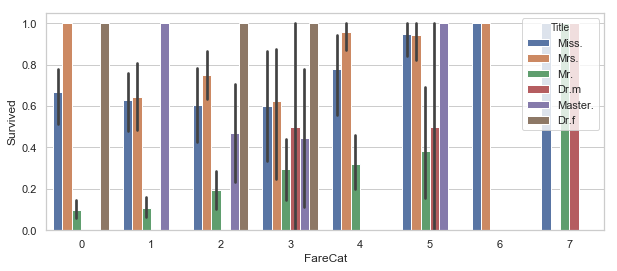

In [13]:

plt.figure(figsize=(10,4))
sns.barplot(x='FareCat', y='Survived',data= data, hue= 'Title')

In [14]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'TicketID', 'Family Name',
       'Title', 'FareCat'],
      dtype='object')

In [15]:
# Fill missing Age
## Lets predict the age of a person and fill the missing Age
features = ['Pclass','SibSp','Parch','Fare','TicketID']
from sklearn.ensemble import ExtraTreesRegressor as ETRg

Etr = ETRg(n_estimators = 200, random_state = 2)
AgeX_Train = data[features][data.Age.notnull()]
AgeY_Train = data['Age'][data.Age.notnull()]
AgeX_Test = data[features][data.Age.isnull()]


In [16]:
Etr.fit(AgeX_Train,AgeY_Train)

AgePred = Etr.predict(AgeX_Test)
data.loc[data.Age.isnull(), 'Age'] = AgePred

In [24]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Fare              0
Cabin          1014
Embarked          0
TicketID          0
Family Name       0
Title             0
FareCat           0
AgeCat            0
male              0
Q                 0
S                 0
dtype: int64

In [18]:
#Assuming the embarked data to be 'C'
data.loc[(data.Embarked.isnull()),'Embarked']= 'C'

In [19]:
#Creating a new feature base on the category of the age
def AgeCat(data):
    data['AgeCat'] = 0
    data.loc[(data['Age'] <= 5), 'AgeCat'] = 0
    data.loc[(data['Age'] <= 12) & (data['Age'] > 5), 'AgeCat'] = 1
    data.loc[(data['Age'] <= 18) & (data['Age'] > 12), 'AgeCat'] = 2
    data.loc[(data['Age'] <= 22) & (data['Age'] > 18), 'AgeCat'] = 3
    data.loc[(data['Age'] <= 32) & (data['Age'] > 22), 'AgeCat'] = 4
    data.loc[(data['Age'] <= 45) & (data['Age'] > 32), 'AgeCat'] = 5
    data.loc[(data['Age'] <= 60) & (data['Age'] > 45), 'AgeCat'] = 6
    data.loc[(data['Age'] <= 70) & (data['Age'] > 60), 'AgeCat'] = 7
    data.loc[(data['Age'] > 70), 'AgeCat'] = 8
AgeCat(data)

In [22]:
#Creating the categorical features for the sex and embarked
sex = pd.get_dummies(data.Sex,drop_first=True)
emb = pd.get_dummies(data.Embarked,drop_first=True)

In [23]:
#Merging the categorical features
data = pd.concat([data,sex,emb],axis=1)

In [28]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'TicketID', 'Family Name', 'Title', 'FareCat',
       'AgeCat', 'male', 'Q', 'S'],
      dtype='object')

In [26]:
feat = ['PassengerId', 'Pclass',  'Age', 'SibSp',
       'Parch',  'Fare', 'TicketID',
       'FareCat', 'AgeCat', 'Q', 'S', 'male']


In [27]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [33]:
data.dropna(inplace=True)

In [34]:
#Scaling all the features
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
target = data['Survived'].values
data_scaled = ss.fit_transform(data[feat])
train = data_scaled[0:891].copy()
test = data_scaled[891:].copy()

C:\Users\Rocker\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Rocker\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int16, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [35]:
# Checking best features
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, len(feat))
selector.fit(train, target)
scores = -np.log10(selector.pvalues_)


In [43]:
indices = np.argsort(scores)[::-1]

In [46]:
print('Features importance:')
for i in range(len(scores)):
    print('%.2f %s' % (scores[indices[i]], feat[indices[i]]))

Features importance:
16.68 male
3.35 Age
2.87 AgeCat
2.68 FareCat
1.25 TicketID
1.23 SibSp
1.19 S
1.17 Fare
0.93 PassengerId
0.32 Q
0.23 Parch
0.19 Pclass


In [50]:
from sklearn.ensemble import RandomForestClassifier

parameters = {'max_depth' : [4,5], 
              'n_estimators' : [200,500,600,800,1000], 
              'min_samples_split' : [3,4,5,6],
             }
RFC = RandomForestClassifier(random_state = 20, n_jobs = -1)


In [51]:
# Selecting the best parameters bhy Grid search
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits = 10, random_state = 20)
from sklearn.model_selection import GridSearchCV
SrchRFC = GridSearchCV(RFC, parameters, n_jobs = -1, cv = kf, scoring = 'roc_auc',verbose=1)
SrchRFC.fit(train, target)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 400 out of 400 | elapsed:  4.2min finished
C:\Users\Rocker\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=KFold(n_splits=10, random_state=20, shuffle=False),
       error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=20, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 5], 'n_estimators': [200, 500, 600, 800, 1000], 'min_samples_split': [3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [52]:
#Deploying the Classifier
SrchRFC = RandomForestClassifier(max_depth = 5, min_samples_split = 4, n_estimators = 500,
                                 random_state = 20, n_jobs = -1)
SrchRFC.fit(train, target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=20, verbose=0, warm_start=False)

In [53]:
#Finding the accuracy of the algorithm
from sklearn.metrics import accuracy_score
prc = SrchRFC.predict(train)
accuracy_score(target,prc)

0.9117647058823529